In [27]:
#Importing nessesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [102]:
#load datasets
bank_transactions = pd.read_csv("bank_transaction.csv")
user_profiles = pd.read_csv("user_profile.csv")

In [ ]:
print(bank_transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258779 entries, 0 to 258778
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   client_id    258779 non-null  int64  
 1   bank_id      258779 non-null  int64  
 2   account_id   258779 non-null  int64  
 3   txn_id       258779 non-null  int64  
 4   txn_date     258779 non-null  object 
 5   description  258779 non-null  object 
 6   amount       258779 non-null  float64
 7   category     258522 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 15.8+ MB
None


In [103]:
print(user_profiles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   CLIENT_ID                      1000 non-null   int64
 1   IS_INTERESTED_INVESTMENT       1000 non-null   bool 
 2   IS_INTERESTED_BUILD_CREDIT     1000 non-null   bool 
 3   IS_INTERESTED_INCREASE_INCOME  1000 non-null   bool 
 4   IS_INTERESTED_PAY_OFF_DEBT     1000 non-null   bool 
 5   IS_INTERESTED_MANAGE_SPENDING  1000 non-null   bool 
 6   IS_INTERESTED_GROW_SAVINGS     1000 non-null   bool 
dtypes: bool(6), int64(1)
memory usage: 13.8 KB
None


In [104]:
bank_transactions.describe(include='all').style.background_gradient(cmap='Blues')

,client_id,bank_id,account_id,txn_id,txn_date,description,amount,category
count,258779.000000,258779.000000,258779.000000,258779.000000,258779,258779,258779.000000,258522
unique,nan,nan,nan,nan,7183,102108,nan,33
top,nan,nan,nan,nan,2023-09-05 00:00:00,CHECK111,nan,Uncategorized
freq,nan,nan,nan,nan,5580,6697,nan,29392
mean,747.287771,344.082499,393.475355,70141.685655,nan,nan,2.544952,nan
std,253.470559,317.796823,365.154751,63134.367678,nan,nan,81.132139,nan
min,1.000000,1.000000,1.000000,1.000000,nan,nan,-9162.460000,nan
25%,805.000000,2.000000,2.000000,212.000000,nan,nan,-6.000000,nan
50%,880.000000,292.000000,328.000000,61116.000000,nan,nan,-1.876000,nan
75%,880.000000,608.000000,701.000000,125810.500000,nan,nan,2.000000,nan


In [105]:
print(user_profiles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   CLIENT_ID                      1000 non-null   int64
 1   IS_INTERESTED_INVESTMENT       1000 non-null   bool 
 2   IS_INTERESTED_BUILD_CREDIT     1000 non-null   bool 
 3   IS_INTERESTED_INCREASE_INCOME  1000 non-null   bool 
 4   IS_INTERESTED_PAY_OFF_DEBT     1000 non-null   bool 
 5   IS_INTERESTED_MANAGE_SPENDING  1000 non-null   bool 
 6   IS_INTERESTED_GROW_SAVINGS     1000 non-null   bool 
dtypes: bool(6), int64(1)
memory usage: 13.8 KB
None


In [106]:
# Check for missing values
print("\nMissing Values in Bank Transactions:")
print(bank_transactions.isnull().sum())

print("\nMissing Values in User Profiles:")
print(user_profiles.isnull().sum())


Missing Values in Bank Transactions:
client_id        0
bank_id          0
account_id       0
txn_id           0
txn_date         0
description      0
amount           0
category       257
dtype: int64

Missing Values in User Profiles:
CLIENT_ID                        0
IS_INTERESTED_INVESTMENT         0
IS_INTERESTED_BUILD_CREDIT       0
IS_INTERESTED_INCREASE_INCOME    0
IS_INTERESTED_PAY_OFF_DEBT       0
IS_INTERESTED_MANAGE_SPENDING    0
IS_INTERESTED_GROW_SAVINGS       0
dtype: int64


In [107]:
# corious about why the categories where NAs
missing_categories = bank_transactions[bank_transactions['category'].isnull()]

In [108]:
# see if it's only certain clients
print(missing_categories["client_id"].value_counts())
print("\n")
print(missing_categories["description"].value_counts())

client_id
880    186
788     71
Name: count, dtype: int64


description
Transfer from Chime Savings Account                                                                    116
Dandy Mini Mart                                                                                         28
Dunkin Donuts                                                                                           14
Transfer to Chime Savings Account                                                                       13
McDonald's                                                                                              13
Cash App*Maryse Hemant                                                                                  11
ATM Withdrawal                                                                                          10
Cash app*cash out      visa direct  caus                                                                 9
Wendy's                                                                 

In [119]:
# Using account ID instead of client id
print(missing_categories["account_id"].value_counts())

account_id
994    180
1       71
32       6
Name: count, dtype: int64


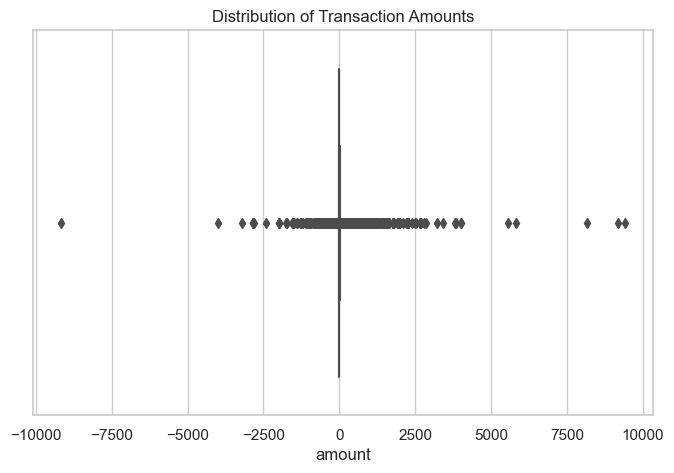

In [109]:
# Check for outliers in the 'amount' column
plt.figure(figsize=(8, 5))
sns.boxplot(data=bank_transactions, x='amount')
plt.title('Distribution of Transaction Amounts')
plt.show()

In [110]:
# Check the date range of the transactions
print("\nDate Range of Transactions:")
bank_transactions['txn_date'] = pd.to_datetime(bank_transactions['txn_date'])
print(f"Start Date: {bank_transactions['txn_date'].min()}")
print(f"End Date: {bank_transactions['txn_date'].max()}")


Date Range of Transactions:
Start Date: 2023-06-01 00:00:00
End Date: 2023-09-30 00:00:00


In [111]:
# Analyze spending habits by grouping by 'client_id'
user_spending = bank_transactions.groupby('client_id')['amount'].agg(['count', 'sum', 'mean', 'median', 'std'])

In [112]:
# Filter only spending transactions (negative amounts)
spending_transactions = bank_transactions[bank_transactions['amount'] < 0]

In [115]:
spending_transactions["account_id"].value_counts()

account_id
74      1049
495      852
704      839
514      775
2        736
        ... 
380        1
1056       1
361        1
491        1
169        1
Name: count, Length: 1129, dtype: int64

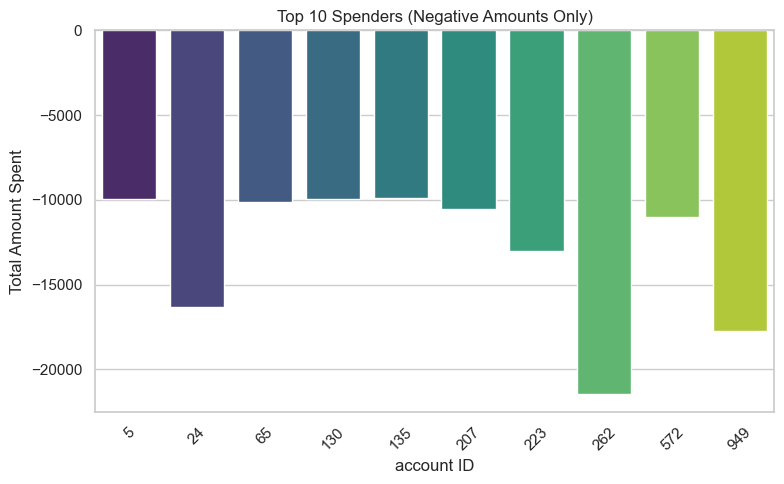

In [117]:
# Top spenders based on spending (negative amounts)
top_spenders = spending_transactions.groupby('account_id')['amount'].sum().sort_values().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_spenders.index, y=top_spenders.values, palette='viridis')
plt.title('Top 10 Spenders (Negative Amounts Only)')
plt.xlabel('account ID')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

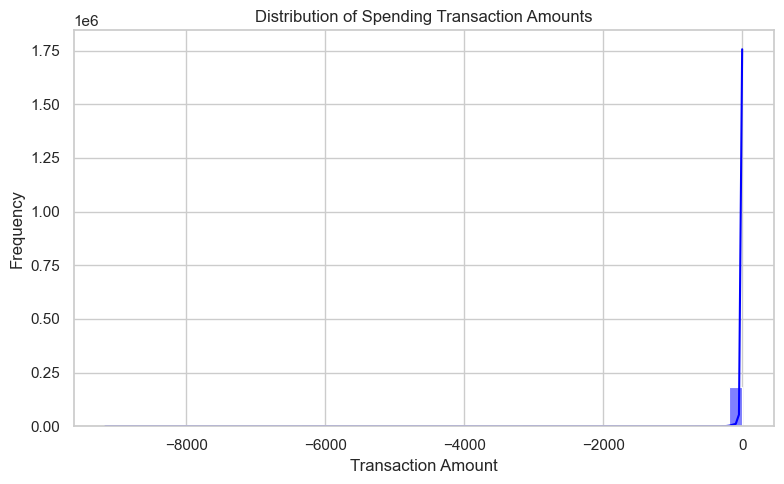

In [121]:
# Spending distribution (negative amounts only)
plt.figure(figsize=(8, 5))
sns.histplot(spending_transactions['amount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Spending Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\Ze Ki\AppData\Local\Temp\ipykernel_4944\2101924379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spending_transactions['week'] = spending_transactions['txn_date'].dt.to_period('W').apply(lambda r: r.start_time)


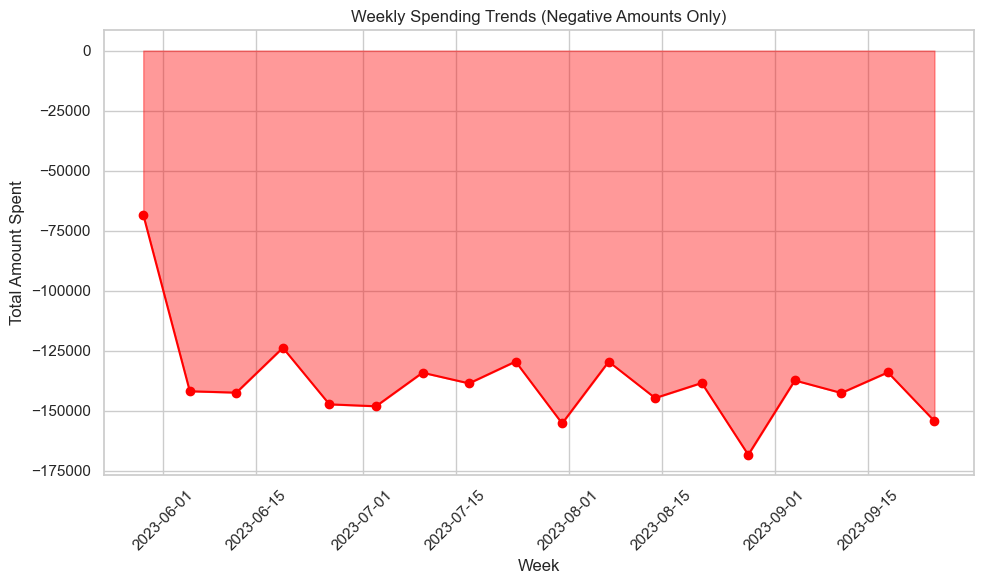

In [ ]:
# Group by week and calculate total spending per week
spending_transactions['week'] = spending_transactions['txn_date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_spending = spending_transactions.groupby('week')['amount'].sum()

# Plotting weekly spending with a line/area graph
plt.figure(figsize=(10, 6))
plt.fill_between(weekly_spending.index, weekly_spending, alpha=0.4, color='red')
plt.plot(weekly_spending.index, weekly_spending, marker='o', color='red')
plt.title('Weekly Spending Trends (Negative Amounts Only)')
plt.xlabel('Week')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

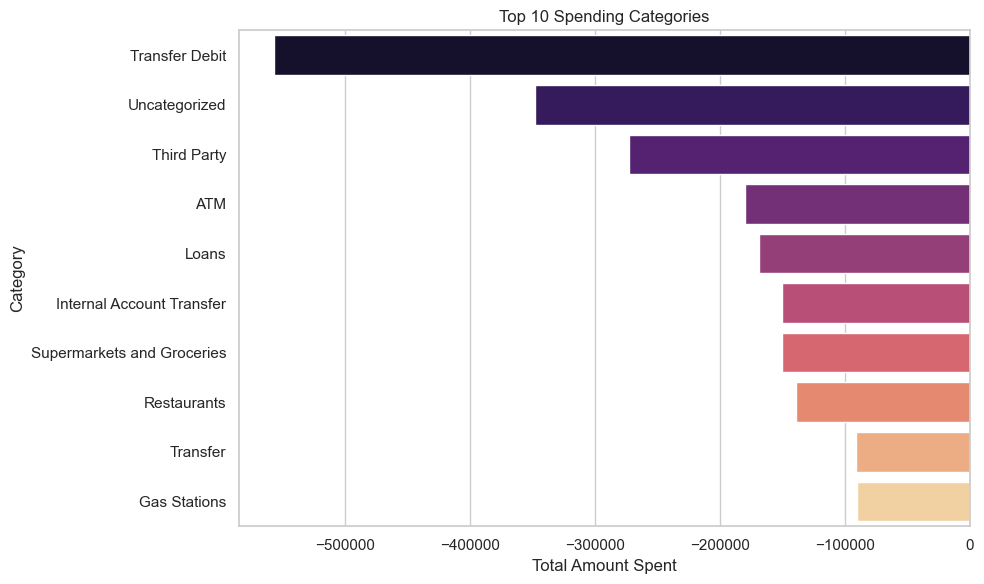

In [125]:
# Spending by category (negative amounts only)
plt.figure(figsize=(10, 6))
spending_by_category = spending_transactions.groupby('category')['amount'].sum().sort_values().head(10)
sns.barplot(x=spending_by_category.values, y=spending_by_category.index, palette='magma')
plt.title('Top 10 Spending Categories')
plt.xlabel('Total Amount Spent')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

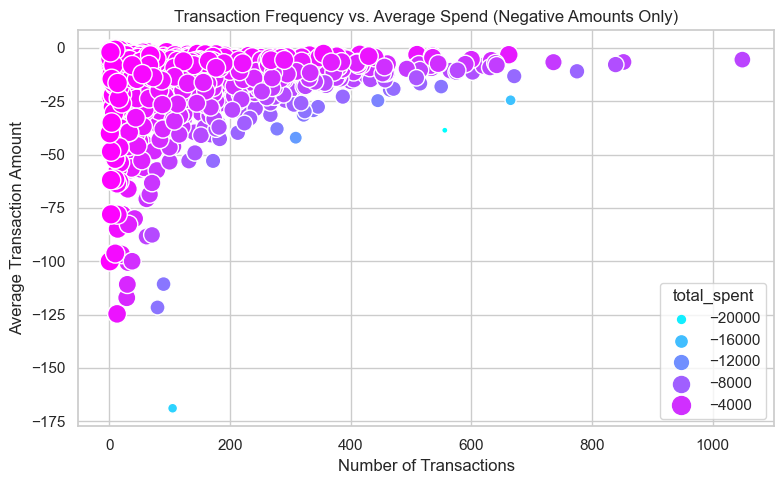

In [126]:
# Transaction frequency vs average spend (negative amounts only)
user_transaction_analysis = spending_transactions.groupby('account_id').agg({'amount': ['count', 'mean', 'sum']})
user_transaction_analysis.columns = ['transaction_count', 'average_spent', 'total_spent']

plt.figure(figsize=(8, 5))
sns.scatterplot(data=user_transaction_analysis, x='transaction_count', y='average_spent', hue='total_spent', palette='cool', size='total_spent', sizes=(20, 200))
plt.title('Transaction Frequency vs. Average Spend (Negative Amounts Only)')
plt.xlabel('Number of Transactions')
plt.ylabel('Average Transaction Amount')
plt.tight_layout()
plt.show()